# Regularized Linear Regression

In this notebook, we are going to try several different forms of linear regression and compare predictive performance on unseen data. The types of regression we are going to try are:

1. Ordinary Least Squares (sklearn.linear_model.LinearRegression)
2. Stochastic Gradient Descent (sklearn.linear_model.SGDRegressor)
3. Ridge Regression (sklearn.linear_model.Ridge)
4. Lasso Regression (sklearn.linear_model.Lasso)
5. ElasticNet Regression (sklearn.linear_model.ElasticNet)

We are going to fit each type of regression using a GridSearchCV, capturing the best hyperparameters, and then we are going to compare the performance of each optimized model on a small set of completely unseen data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pathlib import Path
data_path = Path('drive', 'MyDrive', 'Colab Notebooks', 'SuperFastCourse', 
                 'LinReg', 'prepped_data.csv')
data_path

PosixPath('drive/MyDrive/Colab Notebooks/SuperFastCourse/LinReg/prepped_data.csv')

## Imports

In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import (LinearRegression,
                                  SGDRegressor,
                                  Ridge,
                                  Lasso,
                                  ElasticNet)
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)

import matplotlib.pyplot as plt 
import seaborn as sns

## Load Data

In [5]:
data = pd.read_csv(data_path)
data.head()

,Unnamed: 0,school,sex,address,famsize,Medu,Fedu,studytime,schoolsup,famsup,paid,internet,romantic,freetime,goout,G3
0,0,0,0,1,0,4,4,2,1,0,0,0,0,3,4,6
1,1,0,0,1,0,1,1,2,0,1,0,1,0,3,3,6
2,2,0,0,1,1,1,1,2,1,0,1,1,0,3,2,10
3,3,0,0,1,0,4,2,3,0,1,1,1,1,2,2,15
4,4,0,0,1,0,3,3,2,0,1,1,0,0,3,2,10


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,school,sex,address,famsize,Medu,Fedu,studytime,schoolsup,famsup,paid,internet,romantic,freetime,goout,G3
0,0,0,1,0,4,4,2,1,0,0,0,0,3,4,6
1,0,0,1,0,1,1,2,0,1,0,1,0,3,3,6
2,0,0,1,1,1,1,2,1,0,1,1,0,3,2,10
3,0,0,1,0,4,2,3,0,1,1,1,1,2,2,15
4,0,0,1,0,3,3,2,0,1,1,0,0,3,2,10


In [7]:
X = data.drop('G3', axis=1).copy()
y = data['G3'].copy() 

## Split off a Test Set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(335, 14) (335,)
(60, 14) (60,)


## OLS Model

In [20]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

LinearRegression()

In [21]:
ols_model.coef_

array([ 0.06118321,  0.93652292,  0.93621074,  1.06137196,  0.73173294,
        0.20317064,  0.77998277, -0.80262902, -0.6945    ,  0.8427716 ,
        0.3124217 , -1.59550501,  0.35809841, -0.74515601])

In [22]:
ols_model.intercept_

6.432746017501312

## Stochastic Gradient Descent Model

In [23]:
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)

SGDRegressor()

In [24]:
sgd_model.coef_

array([ 0.42813767,  1.14632082,  1.1518982 ,  1.20333063,  0.78799968,
        0.31023322,  1.21535314, -0.3948957 , -0.49411944,  0.75340619,
        0.65807803, -1.24124819,  0.6610325 , -0.56171037])

In [25]:
sgd_model.intercept_

array([1.80975265])

## Ridge Model

In [31]:
np.logspace(-2, 2, 10)

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [32]:
ridge_model = Ridge()

ridge_params = {'alpha': np.logspace(-2, 3, 10)}
ridge_gs = GridSearchCV(ridge_model, ridge_params)
ridge_gs.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])})

In [34]:
best_ridge_model = ridge_gs.best_estimator_

In [35]:
ridge_gs.best_score_

0.06927904702878696

## Lasso Model

In [37]:
lasso_model = Lasso()

lasso_params = {'alpha': np.logspace(-3, 2, 10)}
lasso_gs = GridSearchCV(lasso_model, lasso_params)
lasso_gs.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])})

In [39]:
best_lasso_model = lasso_gs.best_estimator_

In [40]:
lasso_gs.best_score_

0.04530565794678758

## ElasticNet Model

In [47]:
np.linspace(0.01, 0.5, 9)

array([0.01   , 0.07125, 0.1325 , 0.19375, 0.255  , 0.31625, 0.3775 ,
       0.43875, 0.5    ])

In [48]:
elasticnet_model = ElasticNet()

elasticnet_params = {'alpha': np.logspace(-3, 2, 10),
                     'l1_ratio': np.linspace(.01, 0.5, 9)}
en_gs = GridSearchCV(elasticnet_model, elasticnet_params)
en_gs.fit(X_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.01   , 0.07125, 0.1325 , 0.19375, 0.255  , 0.31625, 0.3775 ,
       0.43875, 0.5    ])})

In [50]:
best_elasticnet_model = en_gs.best_estimator_

## Fit Best Models to the Whole Training Data

In [53]:
ridge_model = Ridge(alpha=ridge_gs.best_params_['alpha'])
ridge_model.fit(X_train, y_train)
ridge_model.coef_

array([-0.03365901,  0.51864783,  0.42634979,  0.49617474,  0.65418198,
        0.19471666,  0.50590984, -0.27217541, -0.32904251,  0.43188758,
        0.16259623, -0.74971882,  0.26797779, -0.57915672])

In [55]:
lasso_model = Lasso(alpha=lasso_gs.best_params_['alpha'])
lasso_model.fit(X_train, y_train)
lasso_model.coef_

array([ 0.        ,  0.8031426 ,  0.72222648,  0.8526913 ,  0.76781346,
        0.12744768,  0.67003516, -0.37651127, -0.45716237,  0.64056961,
        0.00843231, -1.33723221,  0.30295145, -0.67794383])

In [56]:
elasticnet_model = ElasticNet(alpha=en_gs.best_params_['alpha'], l1_ratio=en_gs.best_params_['l1_ratio'])
elasticnet_model.fit(X_train, y_train)
elasticnet_model.coef_

array([-0.02242883,  0.5931442 ,  0.49807671,  0.58257922,  0.68142284,
        0.19026796,  0.55556665, -0.32622179, -0.38682793,  0.49547688,
        0.1810121 , -0.87840244,  0.28791353, -0.61454808])

In [57]:
ols_model.coef_

array([ 0.06118321,  0.93652292,  0.93621074,  1.06137196,  0.73173294,
        0.20317064,  0.77998277, -0.80262902, -0.6945    ,  0.8427716 ,
        0.3124217 , -1.59550501,  0.35809841, -0.74515601])

In [58]:
sgd_model.coef_

array([ 0.42813767,  1.14632082,  1.1518982 ,  1.20333063,  0.78799968,
        0.31023322,  1.21535314, -0.3948957 , -0.49411944,  0.75340619,
        0.65807803, -1.24124819,  0.6610325 , -0.56171037])

## Predict on the Test Dataset

In [59]:
ols_pred = ols_model.predict(X_test)
sgd_pred = sgd_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
ols_mse = mean_squared_error(y_test, ols_pred)
sgd_mse = mean_squared_error(y_test, sgd_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
en_mse = mean_squared_error(y_test, elasticnet_pred)

In [67]:
Models = ['OLS', "SGD", 'Ridge', "Lasso", 'ElasticNet']
performance = pd.DataFrame([ols_mse, sgd_mse, ridge_mse, lasso_mse, en_mse], index=Models, columns=['MSE'])

In [68]:
performance

,MSE
OLS,11.222223
SGD,12.590546
Ridge,10.822937
Lasso,11.301458
ElasticNet,10.850662


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

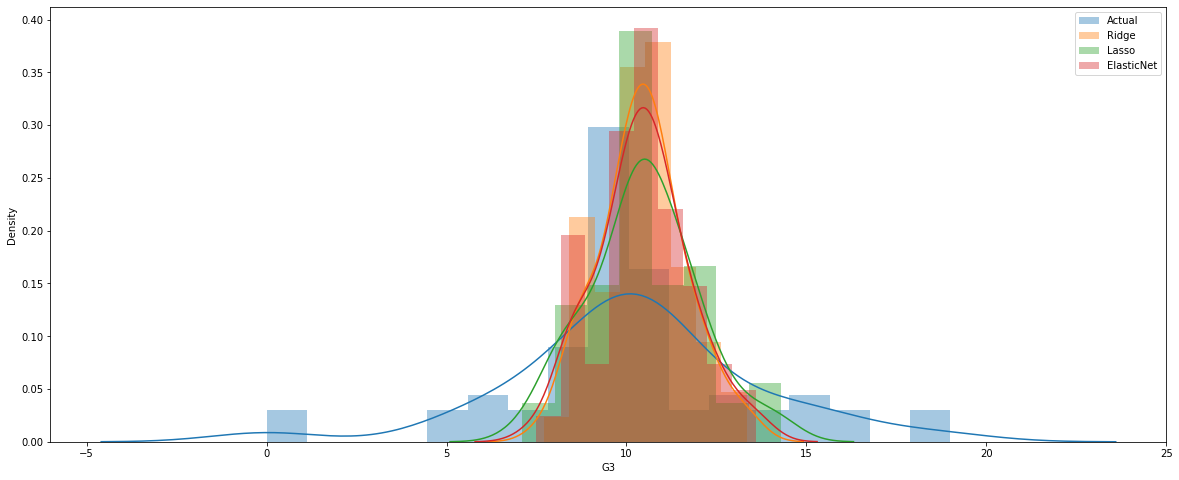

In [74]:
plt.figure(figsize=(20,8))
sns.distplot(y_test, label='Actual')
#sns.distplot(ols_pred, label='OLS')
#sns.distplot(sgd_pred, label='SGD')
sns.distplot(ridge_pred, label='Ridge')
sns.distplot(lasso_pred, label='Lasso')
sns.distplot(elasticnet_pred, label='ElasticNet')
plt.legend();